### Исследование и Аналитика в Яндекс.Афише

Цель проекта:
- Научиться считать и строить метрики;
- Научиться интерпритировать полученные данные;
- Научиться на основе данных давать необходимые рекомендации.

### План работ по проекту:
1. Подготовка всех необходимых библиотек, открытие файла  и знакоство с данными;
2. [Предобработка данных](#step_1):
    - [Преобразование регистра столбцов](#step_1);
    - [Изменение формата данных ](#step_1);
3. Построение отчётов и подсчет метрик:
   - [Сколько людей пользуются в день, неделю, месяц?](#step_2);
   - [Сколько сессий в день?](#step_3);
   - [Сколько длится одна сессия?](#step_4);
   - [Как часто люди возвращаются?](#step_5);
   - [Когда люди начинают покупать?](#step_6);
   - [Сколько раз покупают за период?](#step_7);
   - [Какой средний чек?](#step_8);
   - [Сколько денег приносят? (LTV)](#step_9);
   - [Сколько денег потратили? Всего / на каждый источник / по времени](#step_10);
   - [Сколько стоило привлечение одного покупателя из каждого источника?](#step_11);
   - [На сколько окупились расходы? (ROI)](#step_12);
4. [Общий вывод](#step_13)

### Шаг 1. Подготовка всех необходимых библиотек, открытие файла  и знакоство с данными

In [1]:
# импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import datetime
import warnings
pd.set_option('display.max_columns', 500)
warnings.filterwarnings('ignore')

In [2]:
# ознакомление с данными

,Device,End Ts,Source Id,Start Ts,Uid
321595,desktop,2017-08-28 15:22:00,3,2017-08-28 15:18:00,13278014543954536258
178199,desktop,2017-12-14 21:48:00,3,2017-12-14 21:20:00,16601772969523196183
142764,touch,2018-05-25 07:41:00,3,2018-05-25 07:33:00,10210858062240204925
177019,touch,2017-06-04 21:16:00,10,2017-06-04 21:00:00,1350786150409842529
222141,desktop,2017-12-17 10:37:00,3,2017-12-17 10:36:00,5511939461672948817
189093,touch,2017-11-15 14:47:00,1,2017-11-15 14:46:00,3203873521005052959
30819,desktop,2017-10-29 22:38:00,10,2017-10-29 22:25:00,3277748596163346856
111287,desktop,2018-05-25 14:52:00,3,2018-05-25 14:51:00,8251152076696384921
100966,desktop,2018-02-27 15:28:00,3,2018-02-27 15:27:00,12172463222539946289
264299,touch,2018-05-05 20:43:00,4,2018-05-05 20:42:00,143484444609864703


In [3]:
df_vis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [4]:
# поменять регистр  и пропуски в них _ дата преобразовать 

In [5]:
# ознакомление с данными

,Buy Ts,Revenue,Uid
27667,2018-01-02 14:31:00,1.22,1606744989784955898
36212,2018-02-21 17:40:00,2.08,11416125471762779604
46106,2018-05-01 19:47:00,4.89,16550648357169117407
25193,2017-12-21 12:35:00,2.14,13639433075681291128
10313,2017-10-03 13:05:00,12.22,17999372575896145244
44847,2018-04-20 18:05:00,4.89,8492058746332083822
37857,2018-03-02 19:03:00,0.61,6213108241685969512
41645,2018-03-25 08:12:00,1.78,13910548766435743648
43869,2018-04-12 13:36:00,2.20,2966402498800652096
17968,2017-11-16 22:35:00,6.42,9147340995899007804


In [6]:
df_ord.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [7]:
# ознакомление с данными

,source_id,dt,costs
493,2,2017-10-09,152.23
1565,5,2017-09-22,127.55
1242,4,2017-11-01,90.16
1940,9,2017-10-03,35.22
1884,9,2017-08-08,7.19
1675,5,2018-01-10,180.34
2093,9,2018-03-05,12.26
2156,9,2018-05-09,10.85
127,1,2017-10-06,76.57
1695,5,2018-01-30,205.38


In [8]:
df_cos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


Необходимые преобразования: поменять регистр и привести к удобному для работы формату. 

<a id='step_1'></a>

### Шаг 2. Предобработка данных

##### Преобразование регистра столбцов

In [9]:
# смена регистра

Index(['device', 'end_ts', 'source_id', 'start_ts', 'uid'], dtype='object')

In [10]:
# смена регистра

Index(['buy_ts', 'revenue', 'uid'], dtype='object')

In [11]:
# смена регистра

Index(['source_id', 'dt', 'costs'], dtype='object')

In [12]:
# переименование колонок

#### Изменение формата данных 

Для работы с датой преобразуем столбцы в формат даты.

In [13]:
# преобразование в формат дата

In [14]:
df_vis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
device       359400 non-null object
end_ts       359400 non-null datetime64[ns]
source_id    359400 non-null int64
start_ts     359400 non-null datetime64[ns]
uid          359400 non-null uint64
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


In [15]:
# преобразование в формат дата

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
buy_ts     50415 non-null datetime64[ns]
revenue    50415 non-null float64
uid        50415 non-null uint64
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [16]:
# преобразование в формат дата

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id      2542 non-null int64
acquis_date    2542 non-null datetime64[ns]
costs          2542 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


### Шаг 3. Построение отчётов и подсчет метрик


Вопросы необходимые для решения:
#### Продукт
- Сколько людей пользуются в день, неделю, месяц?
- Сколько сессий в день?
- Сколько длится одна сессия?
- Как часто люди возвращаются?

<a id='step_2'></a>

##### Сколько людей пользуются в день, неделю, месяц?

In [17]:
# для подсчета метрик выделим необходимые нам данные из колонки дата

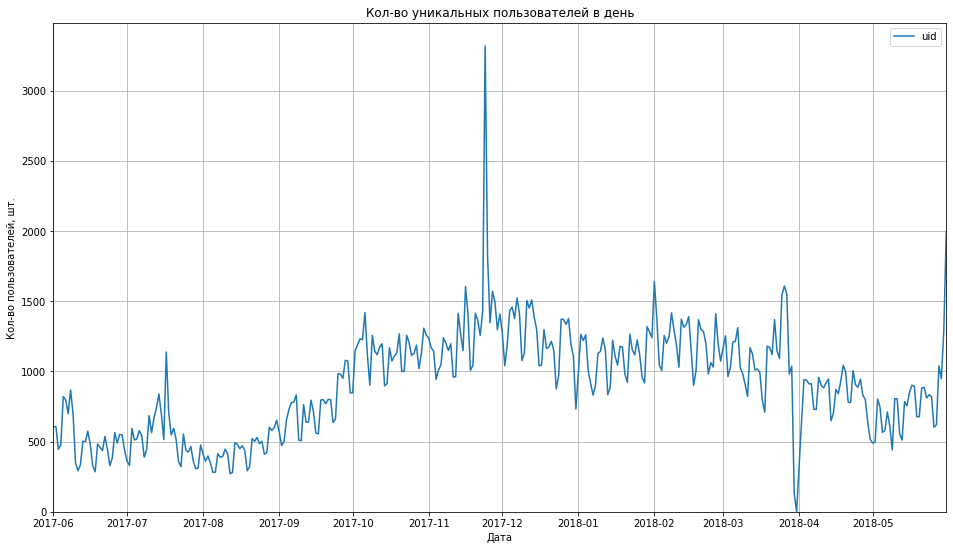

In [18]:
# построим график пользователей по дням

#### Вывод 
На дневном графике мы можем наблюдать, что активность возрастает волнами и мы можем четко видеть 4 недели в промежутке месяца, можно сделать предположение что люди активно пользуются сервисом в рабочую неделю. Так же виден огромный всплеск за неделю до нового года, и есть непонятный провал в использовании до 0 в апреле месяце.

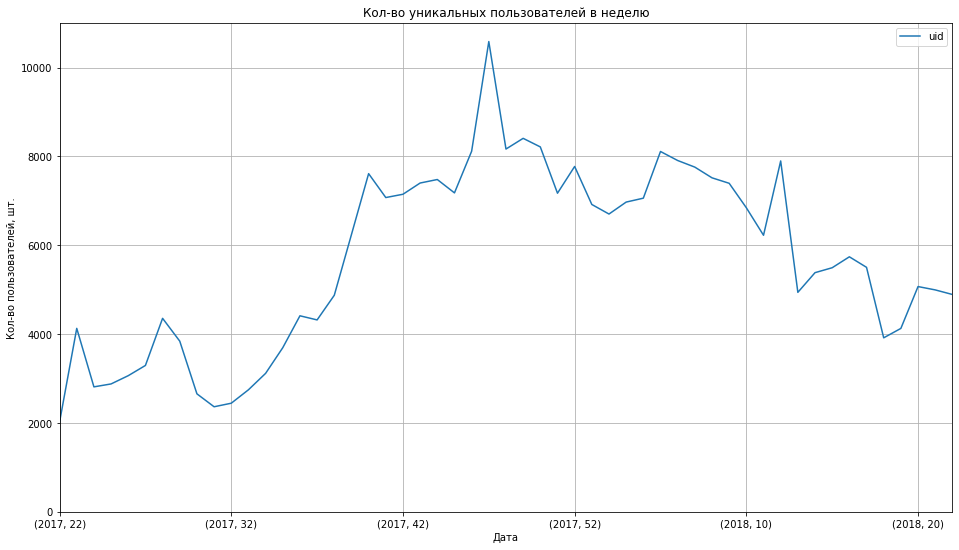

In [19]:
# построим график пользователей по неделям

#### Вывод 
После начала наблюдаемого перидоа мы видим просадку использования в районе 32 недели 2017 года, после идет волна использования сервиса, пик приходится примерно на 47 неделю 2017 года, в конце наблюдаемого периода мы видим спад использования, но он превышает количество использований в начале наблюдаемого периода.

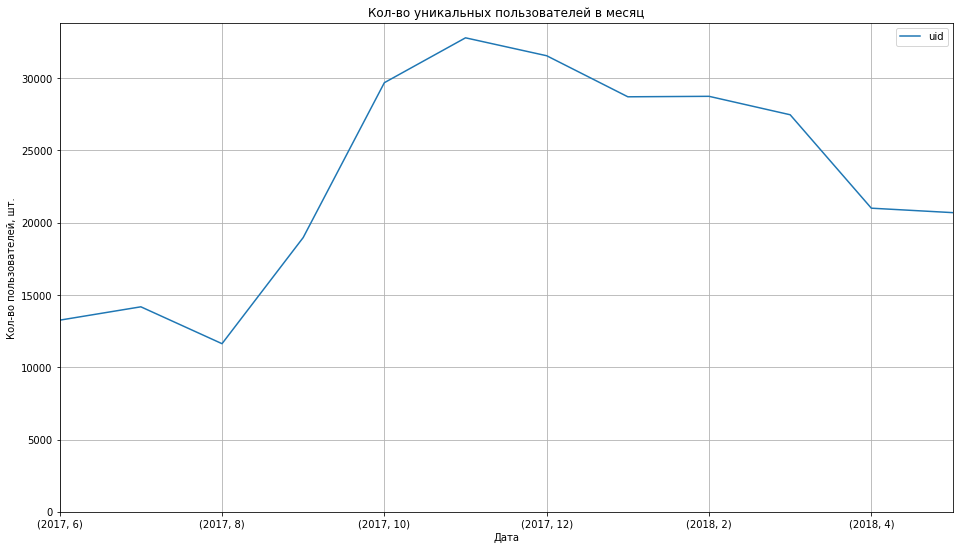

In [20]:
# построим график пользователей по месяцам

#### Вывод 
Как и на предыдущих графиках мы можем наблюдать спад использования в августе, скорее всего он связан с тем что все люди в отпуске. Пик перед новогодними праздниками, поиск подарка и развлечения на НГ, и спад к весне.

<a id='step_3'></a>

##### Сколько сессий в день?

In [21]:
# посчитаем среднее кол-во посещений за день за весь наблюдаемый период 

uid    987.362637
dtype: float64

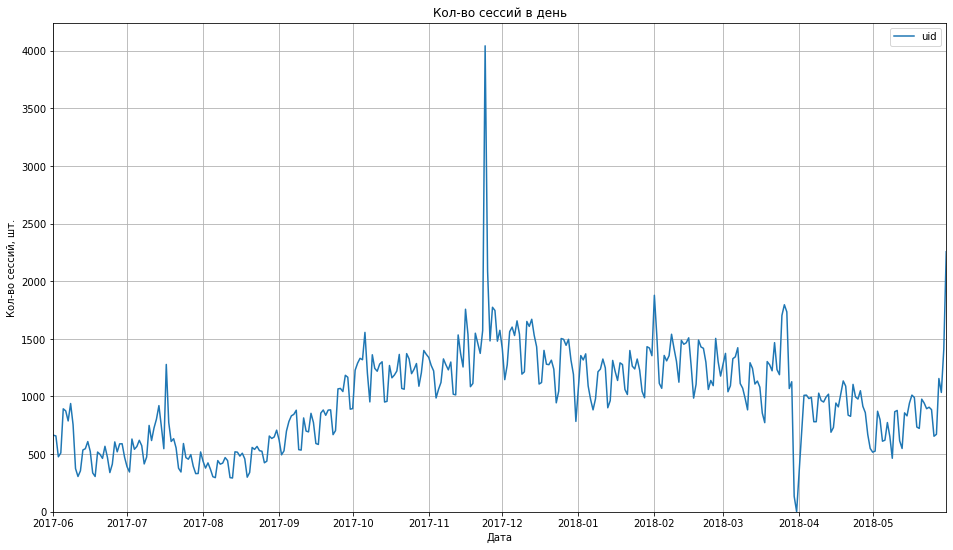

In [22]:
# посчитаем кол-во посещений за день за весь наблюдаемый период  

#### Вывод 
Мы можем видеть, что график кол-ва сессий в день, очень похож на график использования сервиса в день, мы наблюдаем схожие пики и провалы. 

##### Посчитаем среднее кол-во сессий в день за всесь период наблюдения в агрегации по месяцам

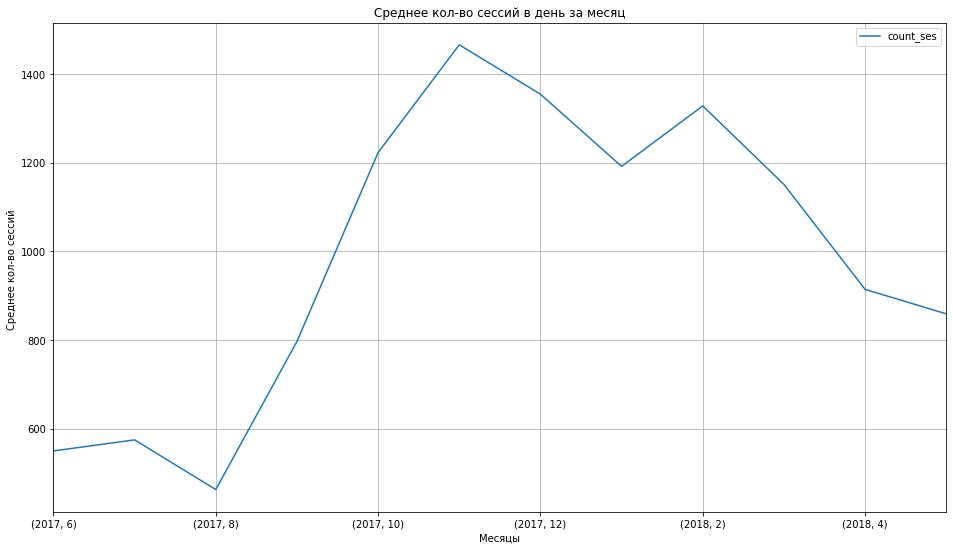

In [23]:
# построение графика

#### Вывод 
На графике мы видим что среднее кол-во сессий растет к концу 2017 года и наблюдаем провал в апреле, и так же можем видеть что в среднем кол-во сессий выросло.

<a id='step_3'></a>

##### Сколько длится одна сессия?

In [24]:
# подсчитаем длительность всех сессий

# подсчитаем среденюю длину сессии


643.506488592098

In [25]:
# применеие describe()

count    359400.000000
mean        643.506489
std        1016.334786
min           0.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       84480.000000
Name: session_duration_sec, dtype: float64

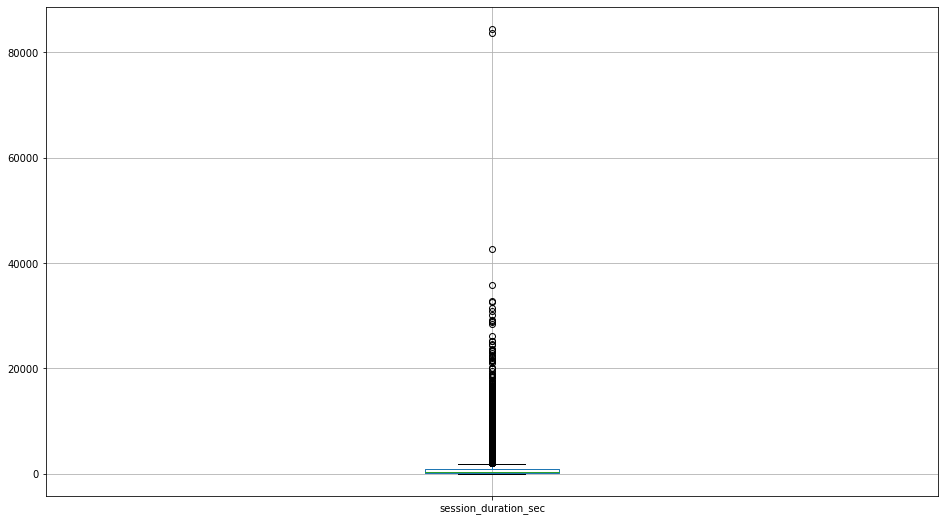

In [26]:
# построение boxplot

На графике мы наблюдаем большое кол-во выбросов, так же длительность сессии имеет значение расположенное в  маленьком временном промежутке.

Посмотрев на разброс значений в длительности сессий считаю необходимым построить две гистограммы визуализации данных:
- График со всеми значениями;
- График значений до 90% от всех значений

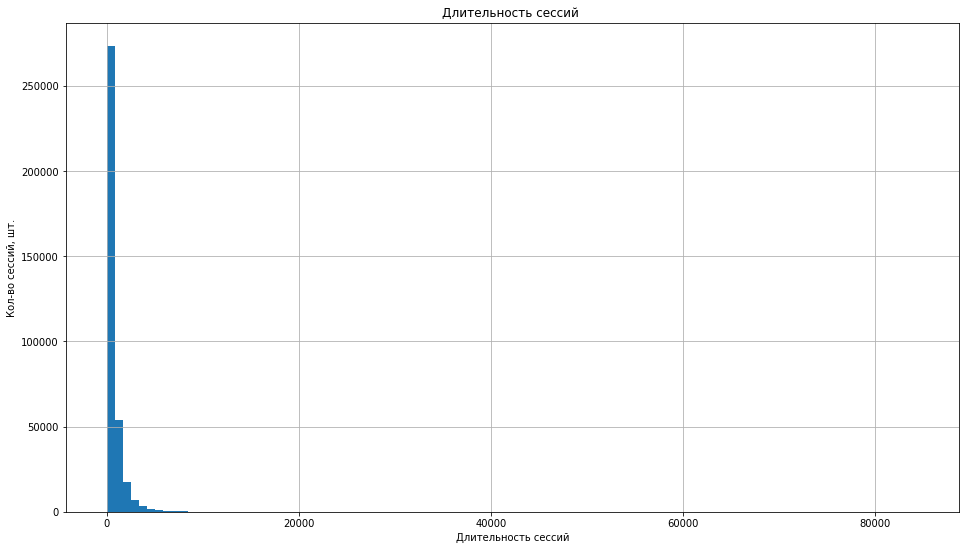

In [27]:
# построение hist()

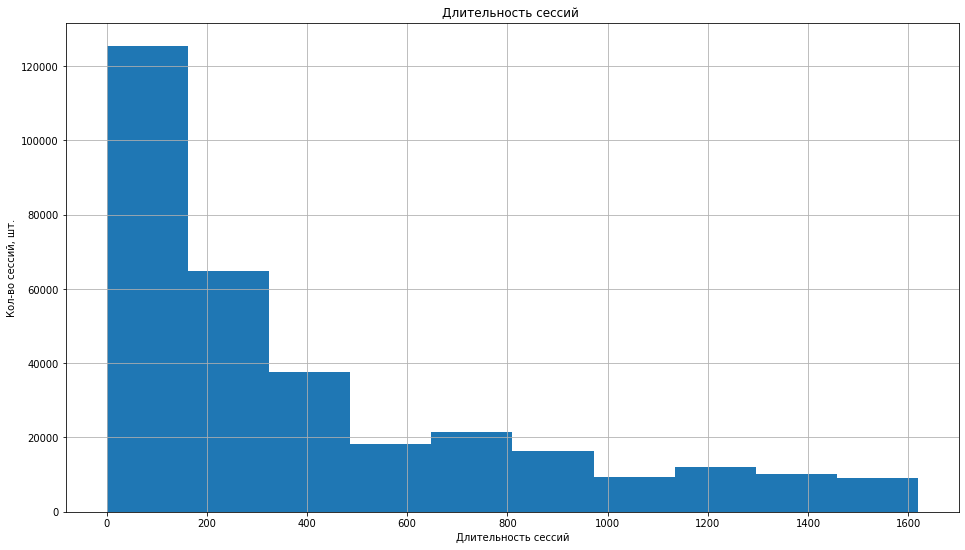

In [28]:
# построение 90% значенией методом hist()

##### Вывод
На графике мы видим что самые большие группы по длительности сессий это сессия до ~180 сек и сессия до ~250 сек. Можно сделать предположение, что в первые две группы относятся те посетители, которые зашли посмотреть что есть нового из мероприятий и узнать цену билета, а к более долгим сессиям можно отнести людей, которые ищут определенный концерт и хотят купить билеты на него.

<a id='step_5'></a>

##### Как часто люди возвращаются?

In [29]:
# преобрразование данных для аостроение таблицы retention

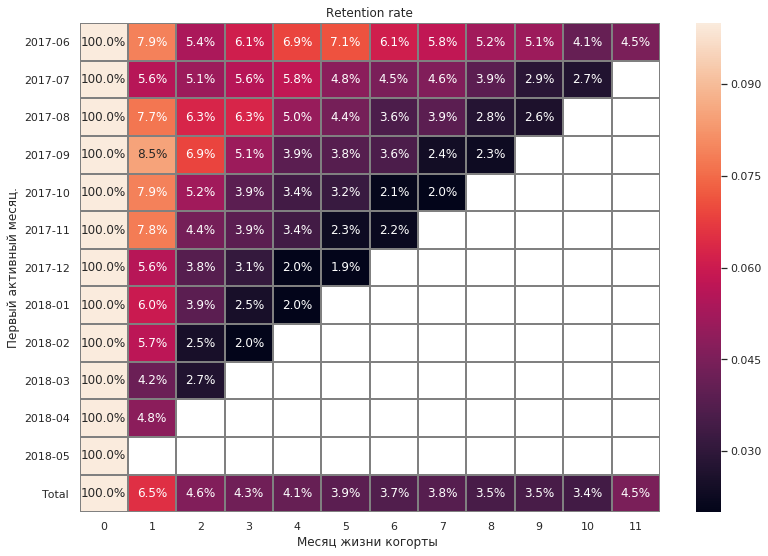

In [31]:
# построение таблицы retention

##### Вывод
Мы можем видеть что самые активные по возвращениям когоры это когорты до декабря 2017 года, больше всего по удержанию людей у нас выделяется первая когорта. Можно сделать предположение что для людей, которые были до декабря 2017 были какие-то особые скидки или условия, что они часто возвращались.

##### Продажи
- Когда люди начинают покупать?
- Сколько раз покупают за период?
- Какой средний чек?
- Сколько денег приносят? (LTV)

Для расчета необходимо добавить столбцы с различными временными параметрами

In [32]:
# для подсчета метрик выделим необходимые нам данные из колонки дата

<a id='step_6'></a>

##### Когда люди начинают покупать?

In [33]:
# посчитаем дату первого визита пользователя

In [34]:
# посчитаем  дату первого заказа пользователя

In [35]:
# присоеденим таблицу методом merge и получим толко те значеня которые есть в обеих таблицах

In [37]:
# проверим получившийся результат на отсутствие отрицательных значений

count    36523.000000
mean        16.893656
std         47.075936
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max        363.000000
Name: day_b, dtype: float64

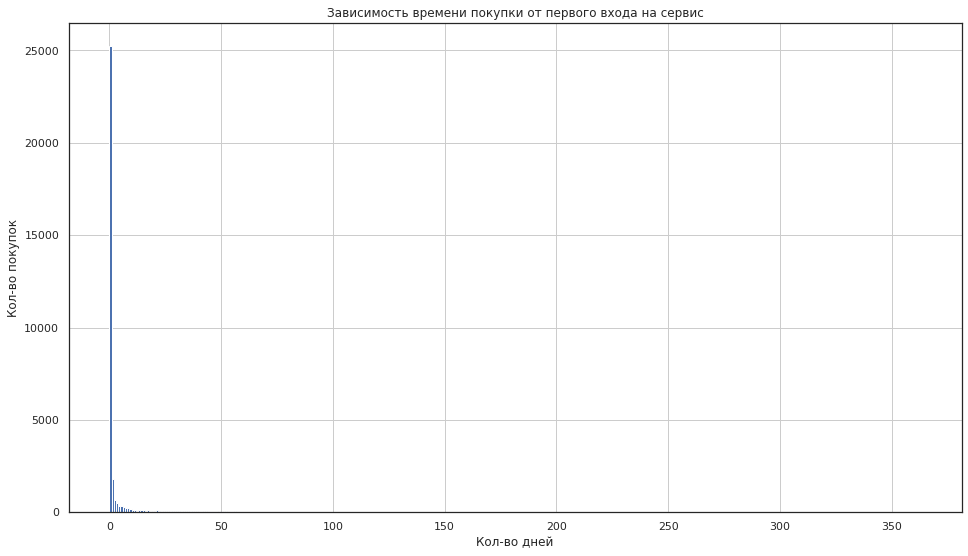

In [38]:
# построим гистограмму

##### Вывод
Посмотрев на график и на его описание мы можем сказать что больше половины пользователей сделали покупки в первый день визита, это дает повод предположить, что чаще всего люди заходят на сервис с желанием приобрести билет и не откладывать покупку.

<a id='step_7'></a>

##### Сколько раз покупают за период?

Посмотрим на график выручки по времени. Оптимальный для рассмотрение график, это график по месяцам.

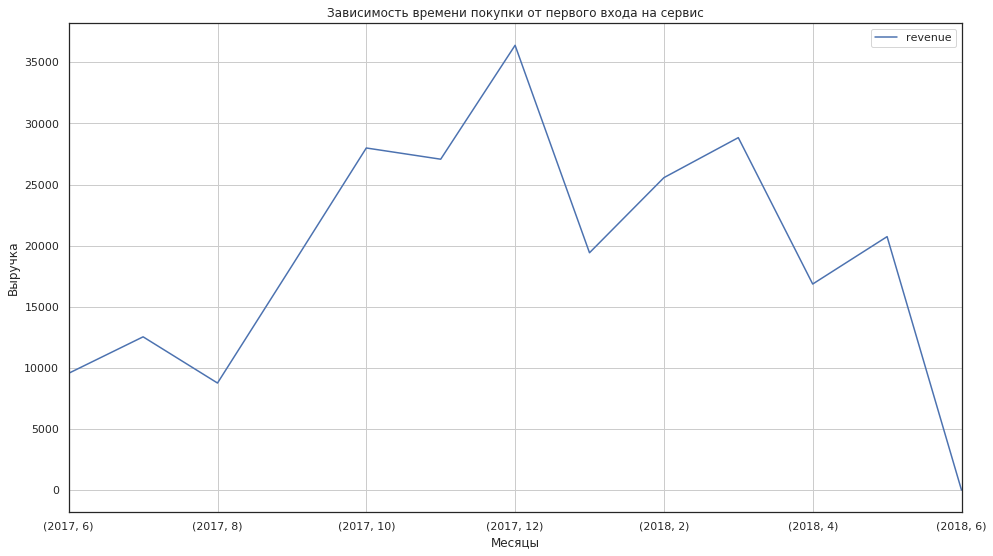

In [39]:
# построение графика

##### Вывод 
На графике мы можем увидеть как растет выручка  ближе к новому году и так же постепенно убывает ближе к концу наблюдаемого периода. Есть предположение, что если выручка начинает падать после 3 месяца 2018 года, значит условия изменились , став менее выгодными, или появились изменения в интерфейсе, которые не позволили людям находить нужные им билеты.

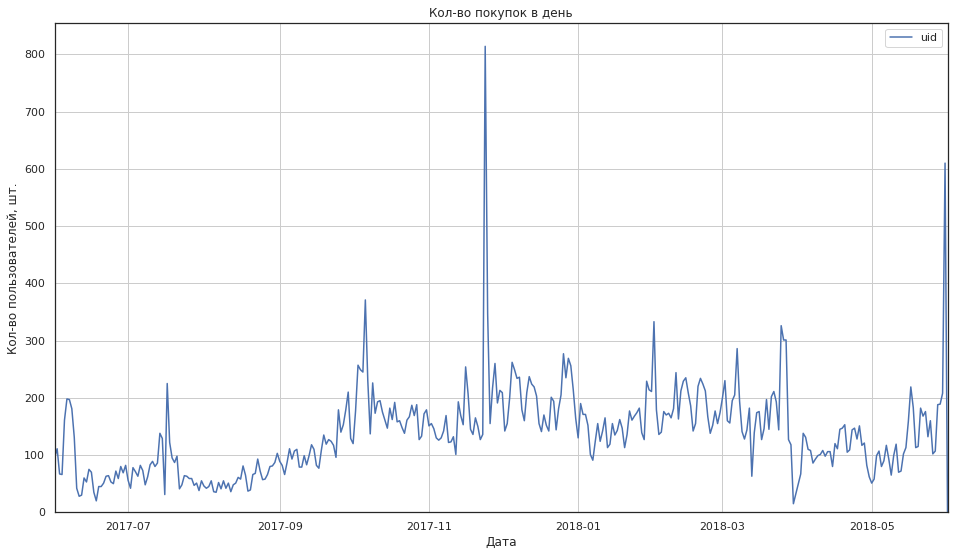

In [40]:
# построение графика кол-во покупок в день 

##### Вывод 
Посмотрев на график можем предположить что люди закупаются билетами раз в два месяца, в эти периоды мы наблюдаем пики покупок.

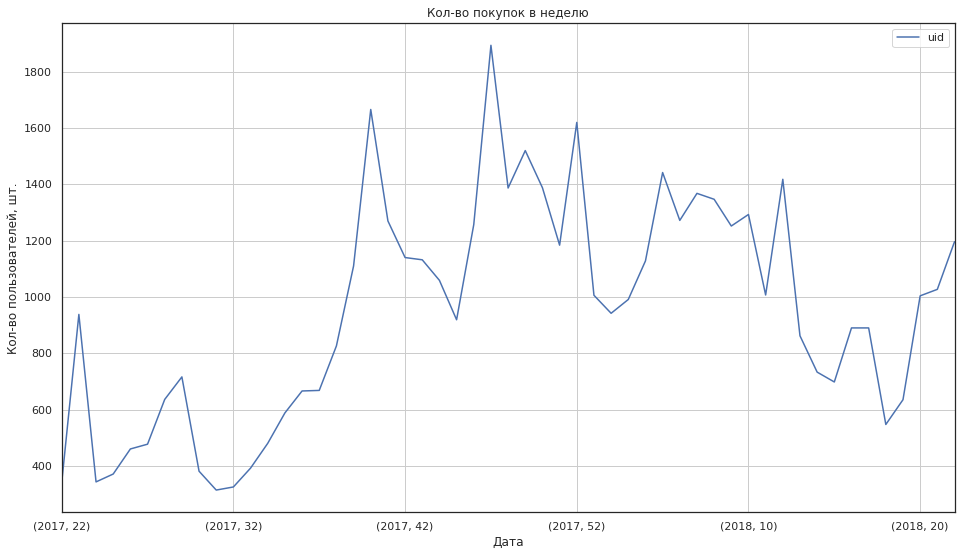

In [41]:
#  построение графика кол-во покупок в неделю

##### Вывод 
На разбивке по неделям мы видим периодичность, о которой мы говорили в предыдущем графике, четко выражены пики и спады в покупательской активности. 

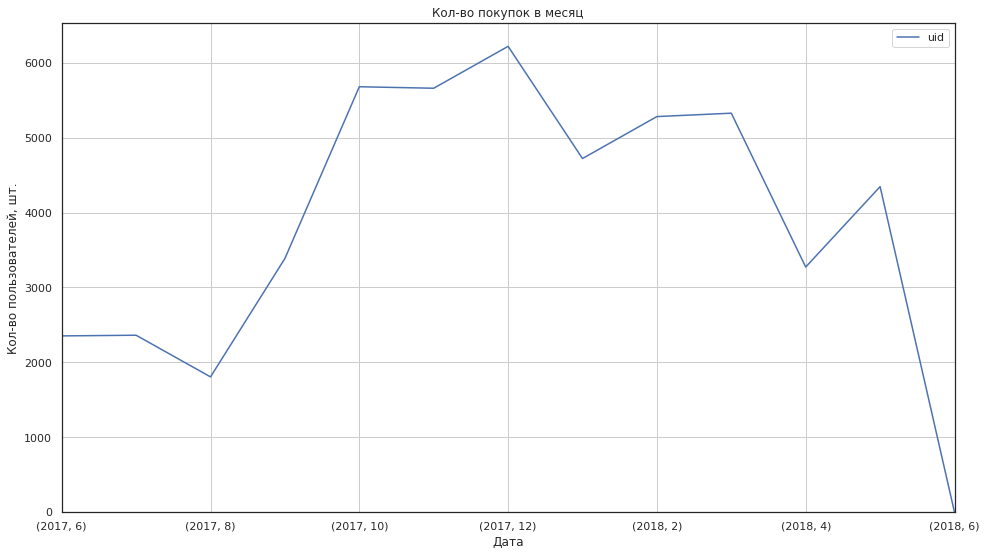

In [42]:
# построение графика кол-во покупок в месяц

##### Вывод 
На графике наблюдаем прирост покупок билетов к концу года и небольшой спад ко времени когда погода становится лучше и можно организовывать досуг на природе.

<a id='step_8'></a>

##### Какой средний чек?

Подчитаем средний чек за несколько периодов: день, неделю и за месяц.

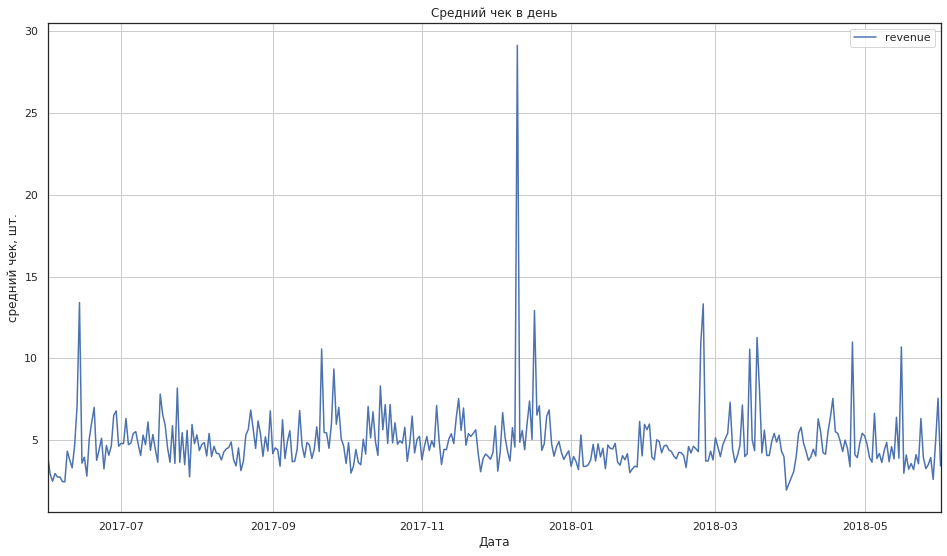

In [43]:
# построение графика средний чек за день

In [44]:
# подсчет среднего

revenue    4.936188
dtype: float64

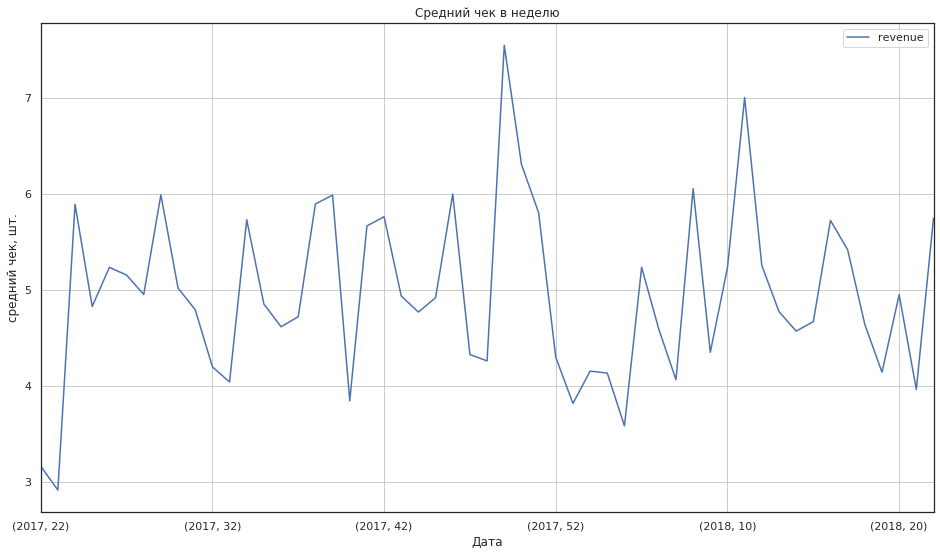

In [45]:
# построение графика средний чек за неделю

In [46]:
# подсчет среднего

revenue    4.951729
dtype: float64

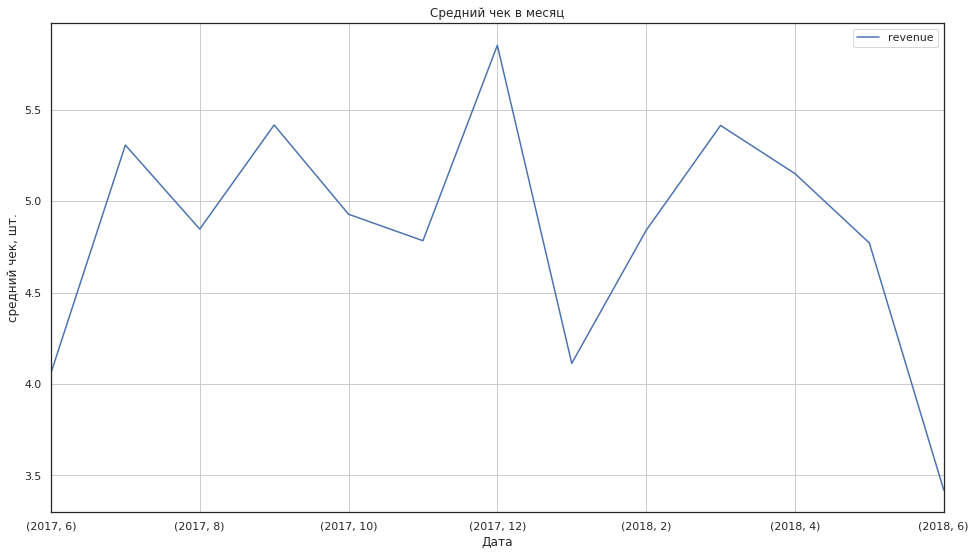

In [47]:
# построение графика средний чек за месяц

In [48]:
# подсчет среднего

revenue    4.8387
dtype: float64

##### Вывод 
Проанализировав графики мы можем сказать что средний чек варьируется не очень сильно в  зависимости от агрегации, везде наблюдаются пики и провалы относительно значения равного 5. Что может нам сказать о том что продажи стабильны и нет каких-то резких изменений, не считая провала в апреле 2018 года.

<a id='step_9'></a>

##### Сколько денег приносят? (LTV)

In [49]:
# преобразование данных для построния таблицы LTV 

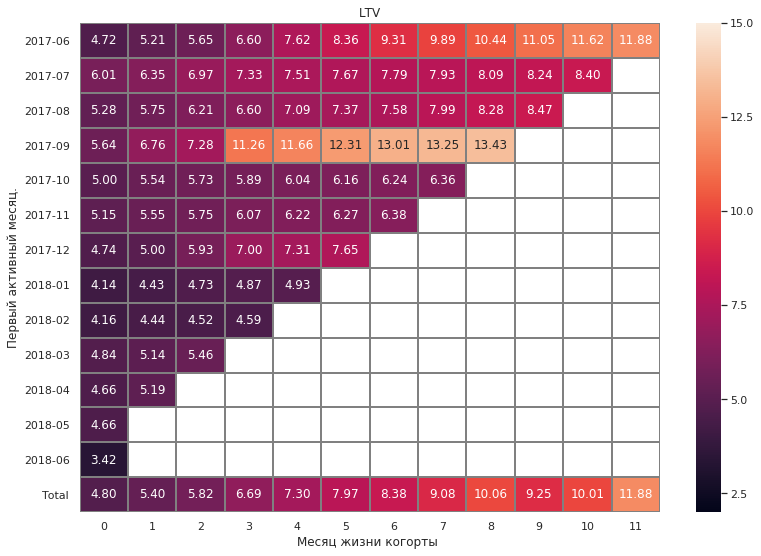

In [54]:
# построение таблицы LTV 

##### Вывод 
На тепловой карте мы видим несколько особо выделяющихся когорт, есть предпложение что эти когорты как я уже говорил ранее попали по особую программу с привелегиями и довольные клиенты этих когорт продолжают приносить нам деньги. 

##### Маркетинг
- Сколько денег потратили? Всего / на каждый источник / по времени?
- Сколько стоило привлечение одного покупателя из каждого источника?
- На сколько окупились расходы? (ROI)

<a id='step_10'></a>

##### Сколько денег потратили? Всего / на каждый источник / по времени?

In [56]:
# сколько потратили денег всего 

329131.62

In [57]:
# проверим за каие источники мы заплатили

array([ 1,  2,  3,  4,  5,  9, 10])

In [58]:
# проверим источники из которых к нам пришли люди 

array([ 4,  2,  5,  9,  3,  1, 10,  7,  6])

Мы можем увидеть два источника за которые мы не платили, а клиенты к нам пришли.

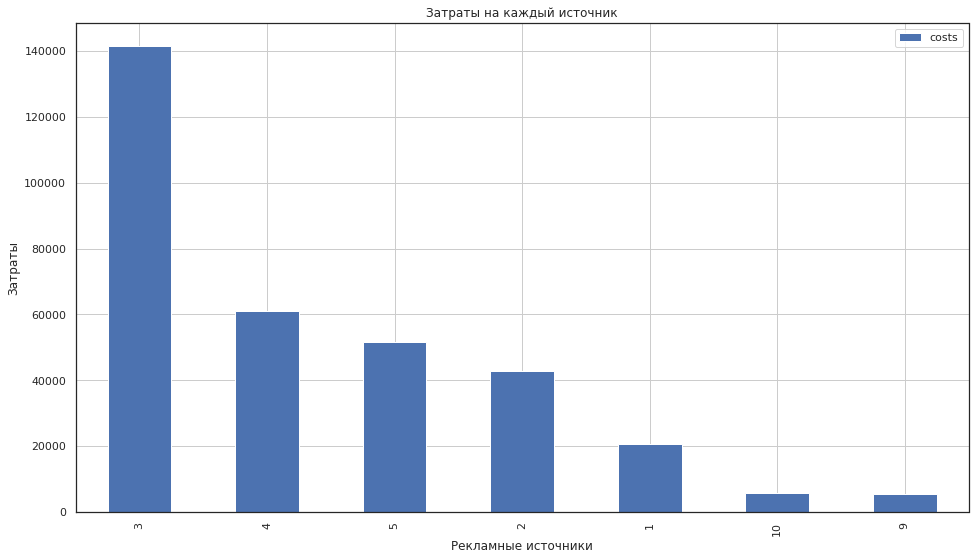

In [59]:
# сколько потратили денег на каждый источник                           

Лидирующую позицию по расходам занимает 3 источник. Расходы на него больше чем в два раза по сравнению со следующим по кол-ву затрат источнику.

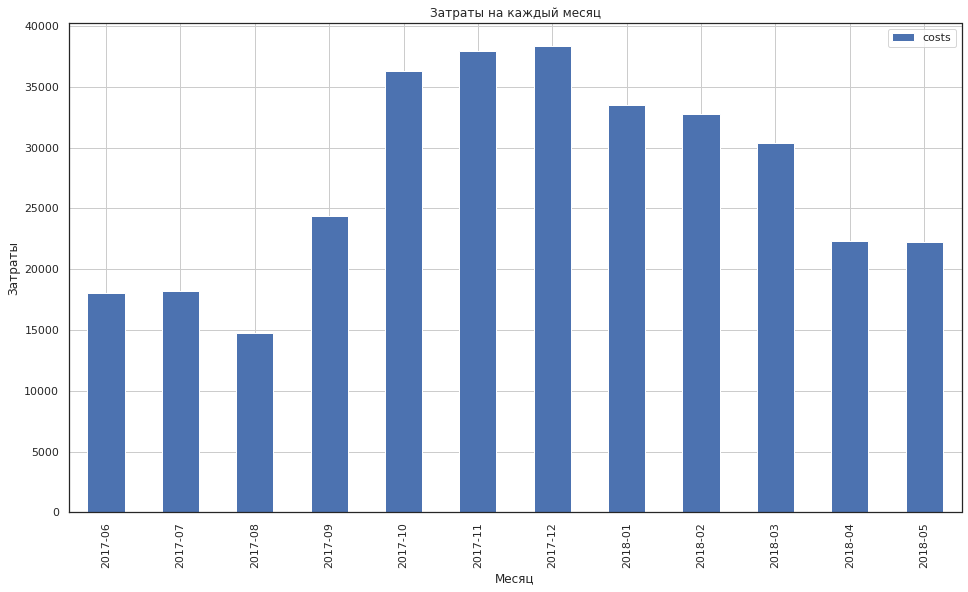

In [60]:
# построение графика  сколько потратили денег на рекламу за месяц  

Самые затратные по привлечению клиентов были новогодние месяцы.

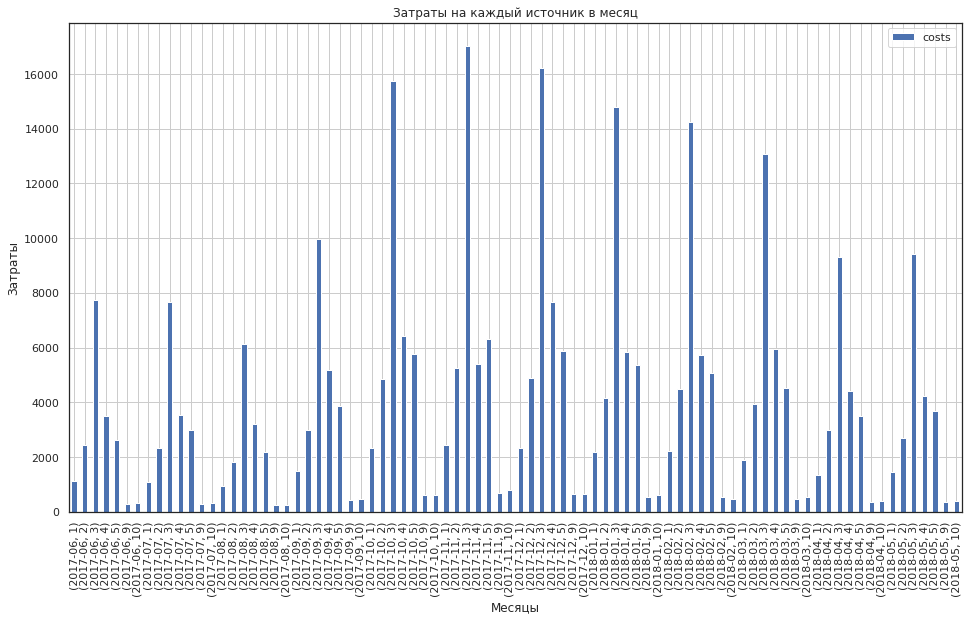

In [61]:
# построение графика  

Как мы видим на графике, больше всего было потрачено средств на привлечение клиентов по 3-ему источнику, и расходы на него были значительно больше чем на другие источники и больше всего рост по израсходованным средствам ушел именно в 3 источник.

<a id='step_11'></a>

##### Сколько стоило привлечение одного покупателя из каждого источника?

In [62]:
# построим таблицу связи между источником устройством и первой сессией
# объединим таблицы 'df_user', 'df_cos' для подчета стоимости привлечения
#добавим стоимость преобретения индив пользователя

,acquis_ts,acquis_date,acquis_month,source_id,device,acquis_cost
uid,,,,,,
469568501030474895,2017-06-01 05:30:00,2017-06-01,2017-06-01,1,desktop,1.60
618675438905551322,2017-06-01 02:37:00,2017-06-01,2017-06-01,1,touch,1.60
1074355127080856382,2017-06-01 09:21:00,2017-06-01,2017-06-01,1,desktop,1.60
1292867924428534308,2017-06-01 12:53:00,2017-06-01,2017-06-01,1,desktop,1.60
1548840741623289234,2017-06-01 01:18:00,2017-06-01,2017-06-01,1,desktop,1.60
...,...,...,...,...,...,...
17550479715346067160,2018-05-31 22:00:00,2018-05-31,2018-05-01,10,touch,0.18
17715613363403416471,2018-05-31 03:30:00,2018-05-31,2018-05-01,10,desktop,0.18
18076428844159112818,2018-05-31 17:47:00,2018-05-31,2018-05-01,10,touch,0.18


In [63]:
# посчитайте помесячные расходы для всей компании
# добавьте помесячные расходы в когортный отчет
# посчитайте CAC
# САС для каждой когорты

,cac
order_month,
2017-06-01,8.905091
2017-07-01,9.195289
2017-08-01,9.728864
2017-09-01,9.657062
2017-10-01,9.399515
2017-11-01,9.381074
2017-12-01,9.289750
2018-01-01,9.370694
2018-02-01,9.325368


In [64]:
# средний САС для всего периода наблюдения

cac    9.329713
dtype: float64

[Рассчет САС для девайсов](#step_14)          [Рассчет САС для источников](#step_15)

<a id='step_12'></a>

##### На сколько окупились расходы? (ROI)

In [65]:
# посчет ROMI

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06,0.53,0.59,0.63,0.74,0.86,0.94,1.05,1.11,1.17,1.24,1.31,1.33
2017-07,0.63,0.67,0.73,0.77,0.79,0.81,0.82,0.84,0.85,0.87,0.88,
2017-08,0.49,0.53,0.57,0.61,0.66,0.68,0.7,0.74,0.77,0.78,,
2017-09,0.60,0.72,0.77,1.19,1.23,1.3,1.38,1.4,1.42,,,
2017-10,0.60,0.66,0.68,0.7,0.72,0.74,0.75,0.76,,,,
2017-11,0.55,0.6,0.62,0.65,0.67,0.68,0.69,,,,,
2017-12,0.54,0.57,0.68,0.8,0.84,0.87,,,,,,
2018-01,0.42,0.45,0.48,0.49,0.5,,,,,,,
2018-02,0.46,0.49,0.5,0.51,,,,,,,,


##### Вывод
Посмотрев на таблицу мы можем сказать что расходы окупились только у двух когорт. Это у когорты 2017-06 на 6 месяце, и у когорты 2017-09  на 3 месяце жизни когорты. Все остольные когорты или не дошли до окупаемости, или еще не достаточно долго живут.

##### Расчет LTV и ROI для источников 

##### LTV для девайсов 

In [66]:
# строим когорты 

# рассчитаем LTV для дивайсов         

,0,1,2,3,4,5,6,7,8,9,10,11
device,,,,,,,,,,,,
desktop,0.728664,0.843359,0.924280,1.069796,1.130539,1.182688,1.219687,1.246150,1.266860,1.288880,1.303720,1.314281
touch,0.373185,0.446775,0.478607,0.502507,0.521153,0.538848,0.551608,0.569115,0.583387,0.596858,0.601088,0.604498


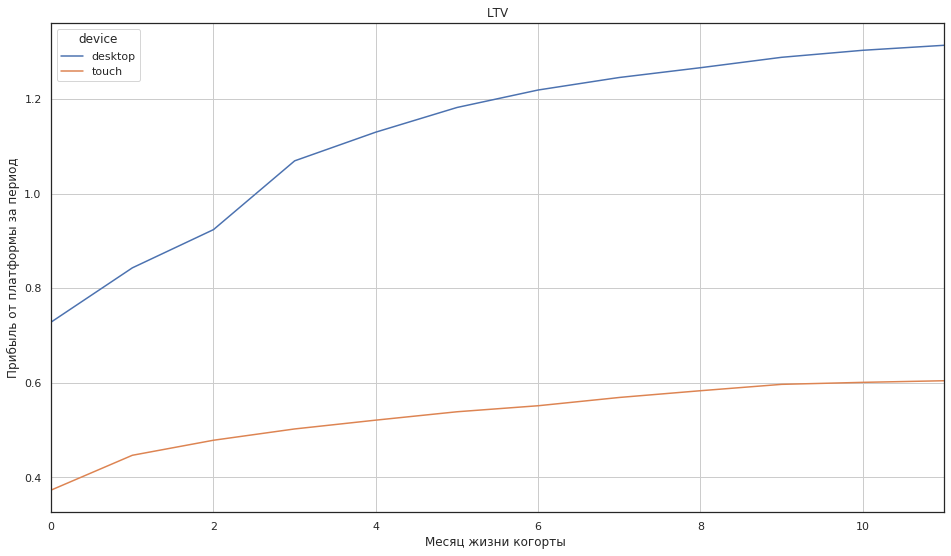

In [67]:
# построение графика 

##### Вывод
- desktop - прибыль от клиентов с этого девайса является большей, так же мы можем видеть что прирост прибыли от клиентов с этого девайса значительно уменьшился после 6 месяца.
- touch - девайс этой когорты перестал значительно расти в прибыли на 4 месяце.

<a id='step_14'></a>

##### ROI для девайсов 

In [68]:
# расчет САС для девайсов

device
desktop    1.461782
touch      1.395098
Name: cac_n, dtype: float64

In [69]:
# расчет ROI для девайсов

,0,1,2,3,4,5,6,7,8,9,10,11
device,,,,,,,,,,,,
desktop,0.498476,0.576939,0.632297,0.731844,0.773398,0.809073,0.834383,0.852487,0.866654,0.881718,0.891870,0.899095
touch,0.267497,0.320246,0.343063,0.360195,0.373560,0.386244,0.395390,0.407939,0.418169,0.427826,0.430858,0.433301


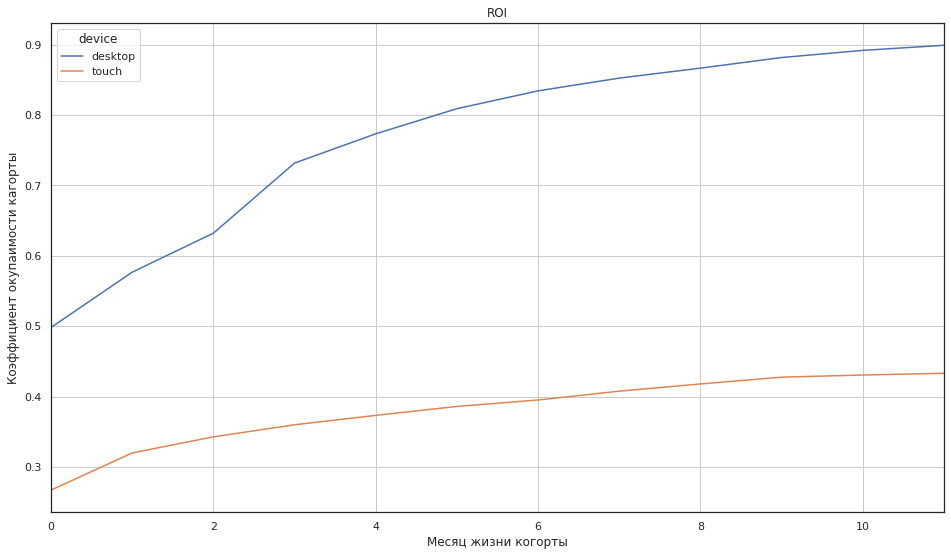

In [70]:
# построение графика 

##### Вывод
- desktop - клиены этого девайса так и не вышли на окупаемость в изучаемом нами периоде, хотя и приблизился к этому больше всего  
- touch - с клиентами этого девайса интенсивный рост окупаемости был до 4 месяца жизни когорты. после значтельно снизился.

##### ROI для источников

In [71]:
# строим когорты 

# рассчитаем LTV для источника       

,0,1,2,3,4,5,6,7,8,9,10
source_id,,,,,,,,,,,
1,1.696636,1.816727,2.072618,2.307836,2.493312,2.606047,2.796018,2.985695,3.113011,3.227996,3.283404
2,1.191046,1.398449,1.957122,2.155572,2.342485,2.411382,2.469348,2.518161,2.601385,2.641813,2.663693
3,0.625473,0.665210,0.710820,0.742250,0.771046,0.791924,0.801979,0.812408,0.817889,0.822212,0.824479
4,0.552446,0.586018,0.618324,0.643797,0.670485,0.698597,0.724404,0.734688,0.760594,0.773152,0.783690
5,0.616533,0.657592,0.893798,0.918467,0.957768,1.004049,1.029419,1.042973,1.063323,1.067149,1.068790
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.038125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.419682,0.472996,0.583842,0.643798,0.712605,0.753949,0.804176,0.842064,0.879967,0.890800,0.893207
10,0.540749,0.563972,0.583672,0.596325,0.622274,0.632313,0.637139,0.639115,0.642121,0.643377,0.644695


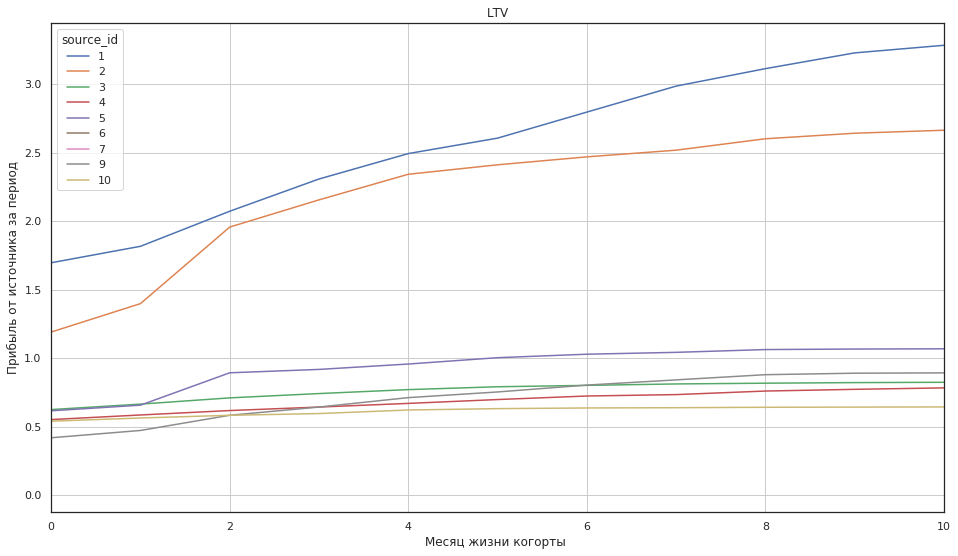

In [72]:
# построение графика 

##### Вывод
    Рассмотрим  источник, клиенты из которого принесли нам больше всего прибыли. Это 1 источник, за время жизни когорты этого источника прибыль с одного клиента выросла практически в два раза.
    Источник номер 2 так же интенсивно приносит прибыль.
    Все остальные источники приносят не так много прибыли и их прибыль со временем не сильно поднялась. 

<a id='step_15'></a>

In [73]:
# расчет САС для источников

source_id
1     2.200355
2     2.429881
3     2.137666
4     0.843857
5     1.050838
6     0.000000
7     0.000000
9     0.846345
10    0.843070
Name: cac_n, dtype: float64

In [74]:
# расчет ROI для источников

,0,1,2,3,4,5,6,7,8,9,10
source_id,,,,,,,,,,,
1,0.771074,0.825652,0.941947,1.048847,1.133141,1.184376,1.270712,1.356915,1.414777,1.467034,1.492216
2,0.490166,0.575522,0.805439,0.887110,0.964033,0.992387,1.016242,1.036331,1.070581,1.087219,1.096224
3,0.292596,0.311185,0.332521,0.347224,0.360695,0.370462,0.375166,0.380045,0.382608,0.384631,0.385691
4,0.654668,0.694452,0.732736,0.762922,0.794549,0.827862,0.858445,0.870631,0.901331,0.916212,0.928700
5,0.586706,0.625779,0.850557,0.874033,0.911433,0.955474,0.979617,0.992515,1.011881,1.015522,1.017084
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,inf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.495876,0.558870,0.689839,0.760681,0.841980,0.890829,0.950176,0.994942,1.039727,1.052527,1.055371
10,0.641405,0.668951,0.692318,0.707326,0.738106,0.750013,0.755737,0.758081,0.761646,0.763136,0.764700


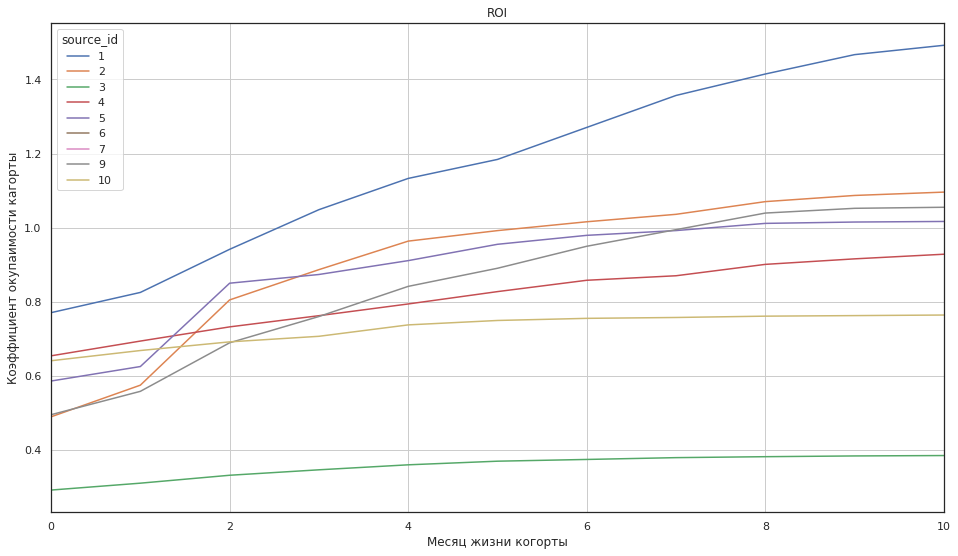

In [75]:
# построение графика 

##### Вывод
    1 источник вышел на окупаемость уже на 3 месяце жизни когорты;
    2 источник вышел на окупаемость уже на 6 месяце жизни когорты;
    5 и 9 источники вышли на окупаемость уже на 8 месяце жизни когорты;
    Есть так же 3 , 4, 10 источники - они так и не вышли на окупаемость за время наблюдения.

<a id='step_13'></a>

### Вывод


Проанализировав данные сделаем выводы:
1. Платформы:
    - desktop - проанализировав метрики LTV и ROI можем сделать выводы что идет неплохое развитее по части этой платформы по принесению прибыли, но мне кажется что необходимо придумать новый дизайн и как-либо мотивировать заходить людей с этой платформы.
    - touch  (мобильная версия) - мое предложение заключается в кардинальной переделки версии для мобильного использования, так как не растет практически прибыль и окупаемость. Значит есть проблемы в использовании этой платформы, и надо уделить больше внимания этому напрвлению, так как оно стремительно развивается в данное время.
    
   - Изучив  метрику о времени через сколько люди покупают, можно сказать, что люди хотят это сделать быстро и не сильно напрягаясь: зашли-ознакомились-купили. Для этого лучше всего подходит мобильная версия, пока человек в дороге или занят чем то не особо важным.
2. Источники:
    - при анализе затрат на источники мы выявили, что есть источники из которых к нам приходят люди, но мы не вкладываем в них на развитие. Необходимо изучить, что это за источники и выяснить рентабельно ли вкладывать хотя бы минимальные средства в их развитие;
    - также считаю, что необходимо пересмотреть затраты и прибыль от источника 3, так как по метрикам LTV и ROI он показывает себя не очень перспективно; 
    - мне кажется необходимо дополниетльное внимание к источнику 1 и 2, так как у них лучшие показатели, а затраты на них, как мы видим из метрик на затраты, не самые приоритетные.
3. Общее:
    - LTV и ROI когорт по месяцам - стоит обратить внимание на то, как и  почему когорта 2017-06 окупилась так быстро и приносит такую прибыль и на ее примере провести похожую работу с остальными когортами и с будущими.
    - Retention rate очень сильно упал, процент возврата даже в когортах, в которых он был высок. Необходимо выяснить что создает проблемы для возврата пользователей.
    - на графике  о количестве пользователей в месяц и неделю, а также на графике среднего чека мы видим что есть конкретные пики, скорее всего связанные не только с какими-то праздниками, но и с получением з/п и люди планируют досуг в это время раз в два месяца, можно более интенсивно напоминать им о мероприятиях, например, каждый месяц.

# 